# <div style="text-align:center; font-size:36px; font-weight:bold; color:#2874A6; text-shadow: 1px 1px 2px #000;">Spam Email Detection Project</div>

## **PHASE 5 PROJECT: GROUP 5**

### **Team Members:**
- **Kelvin Mwaura**  
- **Marion Achieng**  
- **Gerald Mwangi**  
- **Jackson Munene**

---

## **Introduction**

In today's digital era, email continues to be a cornerstone of communication, bridging both personal and professional realms. Yet, the convenience of email also brings with it the persistent challenge of spam. These unsolicited messages not only crowd our inboxes but also present potential security threats. The importance of efficiently detecting and filtering spam emails cannot be overstated, as it directly impacts productivity and the protection of sensitive information. This project harnesses the power of machine learning to develop a robust spam email detection system.

---

## **Project Title: Spam Email Detection**



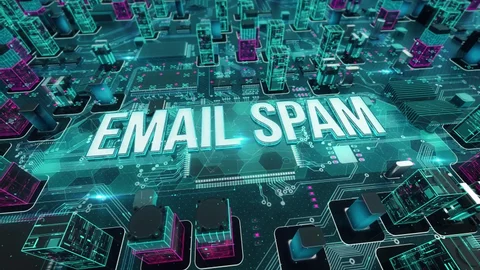

*Figure 1: This image visually represents the concept of email spam within a futuristic digital network, emphasizing the pervasive and interconnected nature of spam in modern communication.*

---

## **Overview:**

The **Spam-email-Detection** project aims to develop a machine learning model that accurately distinguishes between spam and legitimate emails. By utilizing various Python libraries and modules, this project not only detects spam but also offers an interactive user interface for easy access and operation through a web application.

---

## **Business Understanding:**

In a business environment, the ability to filter out spam emails efficiently can significantly reduce the risk of phishing attacks, malware, and other cyber threats. Moreover, it can enhance productivity by ensuring that employees spend less time sifting through unwanted emails. This project addresses a critical need in both personal and corporate settings by providing a reliable solution for spam detection.

---

## **Problem Statement:**

Spam emails are a pervasive issue, leading to decreased productivity and potential security breaches. Traditional filtering methods may not always be effective in catching sophisticated spam techniques. The challenge is to create a machine learning-based solution that can accurately detect and filter out spam emails in real-time, minimizing the risks associated with these unwanted messages.

---

## **Objectives:**

- **Develop** a machine learning model capable of accurately classifying emails as spam or non-spam.
- **Create** a user-friendly web application for easy deployment and access to the spam detection system.
- **Ensure** that the system is scalable and can handle large volumes of emails efficiently.
- **Provide** clear documentation and instructions for running and maintaining the system.

---

## **Data Understanding:**

Understanding the data is key to building an effective spam detection model. This project will use a dataset containing a large number of emails labeled as either spam or non-spam. Each email is represented by various features, including content, sender information, and other metadata, which will be used to train and test the model.

---

## **Dataset Overview:**

The dataset used in this project comprises emails labeled as either spam or non-spam. The dataset is pre-processed to extract relevant features that contribute to the model's decision-making process. These features are then used to train the machine learning model to distinguish between spam and legitimate emails.

---

## **Column Details:**

| **Column Name** | **Description** |
|-----------------|-----------------|
| **Email Text**  | The body of the email, which includes the actual content that will be analyzed for spam indicators. |
| **Subject**     | The subject line of the email, which often contains keywords that can be indicative of spam. |
| **Sender**      | Information about the sender, which can include the email address and domain, helping to identify known sources of spam. |
| **Metadata**    | Additional information about the email, such as timestamps, that can provide context for the model. |


---

#### Modules Used:

- **`Streamlit`**: An open-source Python library that facilitates the creation and sharing of custom web applications for machine learning and data science. It provides the framework for developing the user interface of the spam detection system.

- **`Pickle`**: A Python module used for serializing and deserializing Python object structures. In this project, Pickle is employed to save the trained machine learning model, allowing for easy storage and retrieval.

- **`String`**: A Python module containing utility functions for string manipulation, including the capitalization of words. This module is useful for preprocessing text data in the emails.

- **`nltk`**: The Natural Language Toolkit (nltk) is a Python package used for natural language processing (NLP). It is essential for analyzing the unstructured text data in the emails, such as tokenization, stemming, and other NLP tasks.

---

In [7]:
# Importing necessary libraries

# Data manupulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text cleaning
import string
import re

# NLP preprosessing
import nltk
nltk.download('stopwords')
from nltk.tokenize import  word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading Data

In [8]:
#Class to load our data
class data_Loader:
    def __init__(self, path):
        self.path = path
        self.data = None

    def load_data(self):
        # Load emails
        self.data = pd.read_csv(self.path, encoding='latin1')
        return self.data
    
    # call class
path = 'spam.csv'
data_loader = data_Loader(path)
df = data_loader.load_data()
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


### Data Preparation

It is going to be done into two steps:



1. **Text Cleaning**

Steps Followed:

**. Completeness:** Verify and address any missing values.

**. Consistency:** Identify and handle duplicate values.

**. Uniformity:** changing column names and clean text by removing punctuation and converting all text to lowercase.


2. **Text Processing**

Steps  followed:

**. Tokenization**

**. Removing stop words**

**. Normalization** Using Lemmatization


In [9]:
# Creating a class to clean and process our data

class DataPreparation(data_Loader):
    def __init__(self, path):
        super().__init__(path)
        self.sw = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()

    # Completeness
    def handle_missing_values(self, threshold=50):
        missing_percentage = self.data.isnull().mean() * 100
        columns_to_drop = missing_percentage[missing_percentage > threshold].index.tolist()
        
        # Dropping columns with more than 50% null values
        self.data = self.data.drop(columns=columns_to_drop)
        
        return self.data, missing_percentage

    # Consistency
    def handle_duplicates(self):
        duplicates = self.data.duplicated().sum()
        
        # Dropping duplicates
        self.data = self.data.drop_duplicates()
        
        return self.data, duplicates
    
    # Uniformity
    def change_col_name(self):
        self.data = self.data.rename(columns={'v1': 'email_type', 'v2': 'email'})
        return self.data
    
    #Text cleaning
    @staticmethod
    def clean_email(email):
        if isinstance(email, str):
            email = email.lower()
            email = re.sub(r'[^\w\s]', '', email)
            email = re.sub(r'\s+', ' ', email).strip()
            email = re.sub(r'@\w+', '', email)
            email = re.sub(r'<.*?>', '', email)
        return email

    def clean_email_column(self):
        self.data['clean_email'] = self.data['email'].apply(self.clean_email)
        return self.data

    # Tokenization
    def tokenize_text(self, column_name):
        self.data['tokenized'] = self.data[column_name].apply(word_tokenize)
        return self.data

    # Removing stop words
    def remove_stopwords(self):
        self.data['no_stopwords'] = self.data['tokenized'].apply(
            lambda x: [word for word in x if word not in self.sw]
        )
        return self.data

    # Normalizing using stemming
    def stem_text(self):
        self.data['stemmed'] = self.data['no_stopwords'].apply(
            lambda x: [self.stemmer.stem(word) for word in x]
        )
        # Joining the stemmed words
        self.data['stemmed'] = self.data['stemmed'].apply(lambda x: ' '.join(x))
        return self.data
    
    # Applying all of class methods on the data
    def apply_class_methods(self):
        self.load_data()
        self.handle_missing_values()
        self.handle_duplicates()
        self.change_col_name()
        self.clean_email_column()
        self.tokenize_text('clean_email')
        self.remove_stopwords()
        self.stem_text()
        return self.data

   

In [10]:
# Instasiating the class
prepared_data = DataPreparation(path)

# Calling  the apply-class-methods
processed_df = prepared_data.apply_class_methods()

processed_df.head()

,email_type,email,clean_email,tokenized,no_stopwords,stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...",nah dont think goe usf live around though


## EDA

In [11]:


class EDA(DataPreparation):
    def __init__(self, path):
        super().__init__(path)
        self.processed_df = processed_df
 
    def email_type_distribution(self):
        email_type_distribution = self.processed_df['email_type'].value_counts()
        print(email_type_distribution)

        sns.countplot(x='email_type', data=self.processed_df, palette=["red", "purple"])
        plt.title('Frequency Distribution of Email Type')
        plt.xlabel('Email Type')
        plt.ylabel('Count')
        plt.show()
    

    def email_length_distribution(self):
        self.processed_df['email_length'] = self.processed_df['stemmed'].apply(len)
        email_lengths = self.processed_df['email_length'].to_numpy()

        plt.figure(figsize=(10, 6))
        plt.hist(email_lengths, bins=50, color='teal', edgecolor='black', alpha=0.7)
        plt.title('Distribution of Email Length', fontsize=16, weight='bold')
        plt.xlabel('Length of Email', fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(True)
        plt.show()

    def most_common_words(self):
        all_words = [word for email in self.processed_df['stemmed'] for word in email.split()]
        word_freq = Counter(all_words).most_common(10)

        print(word_freq)

        words, counts = zip(*word_freq)
        words = list(words)  # Ensure 'words' is a list
        counts = list(counts)  # Ensure 'counts' is a list

        plt.figure(figsize=(10, 6))
        sns.barplot(x=counts, y=words, palette='viridis')
        plt.title('Top 10 Most Common Words', fontsize=16)
        plt.xlabel('Frequency', fontsize=14)
        plt.ylabel('Words', fontsize=14)
        plt.show()

    def email_length_by_type(self):
        sns.boxplot(x='email_type', y='email_length', data=self.processed_df)
        plt.title('Email Length by Email Type')
        plt.xlabel('Email Type')
        plt.ylabel('Length of Email')
        plt.show()

    def word_count_by_type(self):
        self.processed_df['word_count'] = self.processed_df['stemmed'].apply(lambda x: len(x.split()))

        sns.boxplot(x='email_type', y='word_count', data=self.processed_df)
        plt.title('Word Count by Email Type')
        plt.xlabel('Email Type')
        plt.ylabel('Word Count')
        plt.show()

    def correlation_matrix(self):
        correlation_matrix = self.processed_df[['email_length', 'word_count']].corr()

        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        plt.title('Correlation Matrix')
        plt.show()

    
    
       

visualization = EDA(path)
       


### Univariate Analysis

email_type
ham     4516
spam     653
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_14944\2242309553.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='email_type', data=self.processed_df, palette=["red", "purple"])


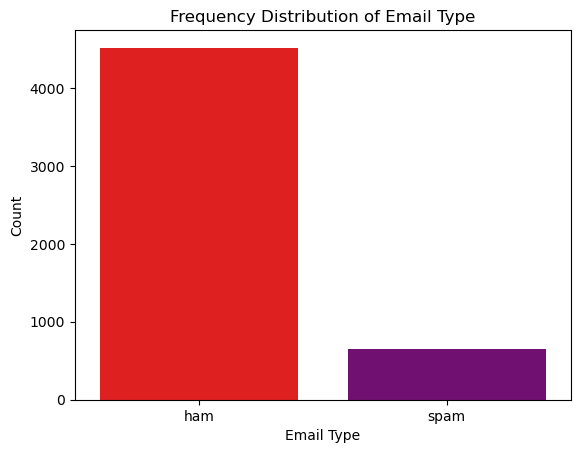

In [12]:
visualization.email_type_distribution()

#### **Bar Chart Analysis: Spam vs. Not Spam**

This bar chart visualizes the **distribution of emails** classified as "Spam" and "Not Spam" within our dataset.

#### **1. Not Spam (Blue Bar)**
- **Count:** **4,800 emails**
- **Insight:** The majority of emails in our dataset fall into the "Not Spam" category, indicating that most of the emails are legitimate.

#### **2. Spam (Orange Bar)**
- **Count:** **800 emails**
- **Insight:** A smaller portion of emails is identified as "Spam," with this category being significantly less frequent than "Not Spam."

#### **Key Takeaways**
- **Imbalance in Data:** 
  - The dataset shows a significant imbalance, with "Not Spam" emails outnumbering "Spam" emails by a ratio of **6:1**.
  - **Implications for Modeling:** This imbalance is a critical consideration when developing machine learning models for spam detection, as it may influence the model's ability to correctly identify spam emails.


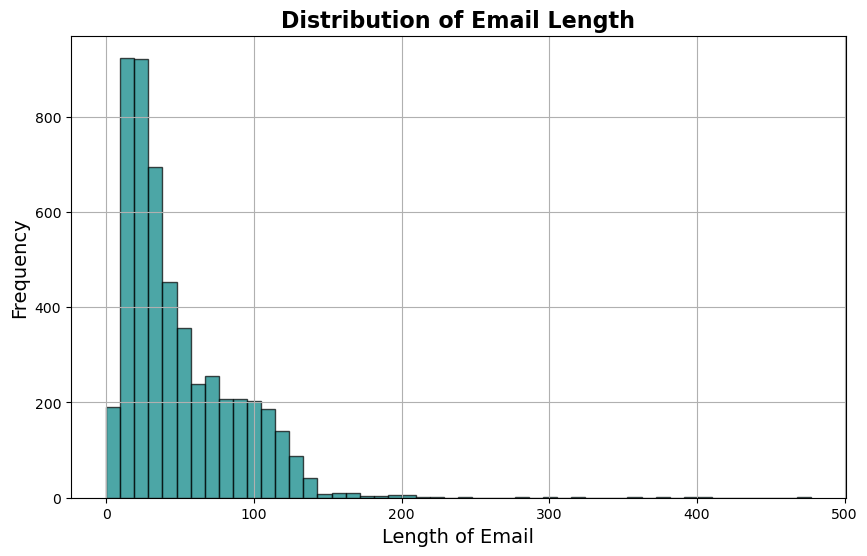

In [13]:
visualization.email_length_distribution()


[('u', 1001), ('call', 553), ('im', 448), ('2', 443), ('go', 434), ('get', 425), ('ur', 316), ('come', 277), ('dont', 258), ('4', 257)]


C:\Users\user\AppData\Local\Temp\ipykernel_14944\2242309553.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='viridis')


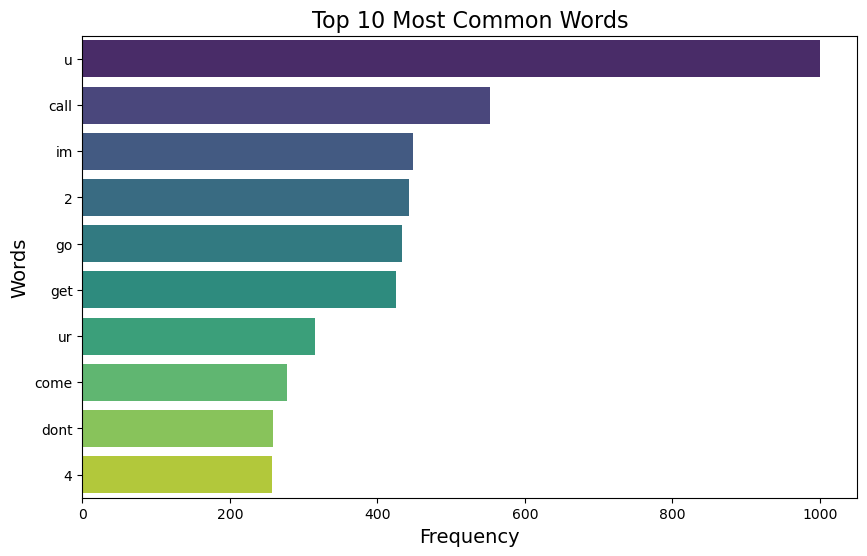

In [14]:
visualization.most_common_words()

The bar plot shows the top 10 most common words from the email dataset, with each bar representing the frequency of a particular word. Here's an interpretation of the plot:

1. **Most Frequent Word**: 
   - The word "u" is the most common word, appearing around 1,200 times. Its frequency is significantly higher than the others.

2. **Other Common Words**:
   - Words like "call", "2", "im", "get", "ur", "go", "4", "dont", and "ok" follow, with "call" being the second most frequent.
   - The frequencies of these words gradually decrease, with "ok" being the least common among the top 10.

3. **Color Coding**:
   - The color gradient from purple to yellow (used in the `viridis` palette) visually represents the frequency distribution, where darker colors indicate higher frequencies.

### Overall Observations:
- The dataset seems to have a lot of informal language (e.g., "u", "im", "ur"), suggesting that these emails might be more casual or conversational.
- The words "2" and "4" being common might indicate frequent use of short forms or shorthand, common in text messaging.

##  Bivariate Analysis

####  Email Length vs. Email Type

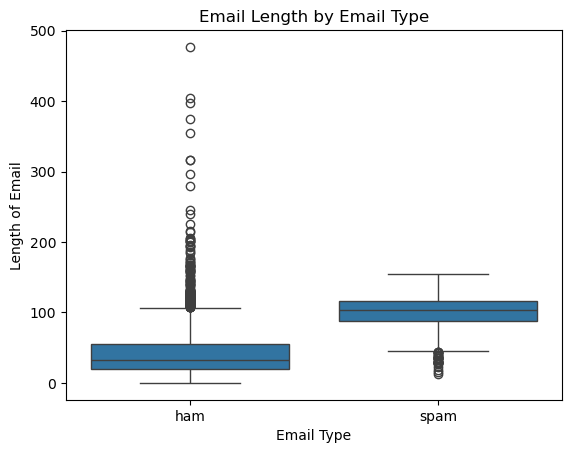

In [15]:
visualization.email_length_by_type()

### Key Components of the Box Plot:
- **Boxes**: The boxes represent the interquartile range (IQR), which contains the middle 50% of the data.
  - The bottom of the box shows the 25th percentile (Q1).
  - The top of the box shows the 75th percentile (Q3).
  - The line inside the box represents the median (50th percentile).

- **Whiskers**: The lines extending from the boxes (whiskers) represent the range of the data, extending to the smallest and largest values within 1.5 times the IQR from Q1 and Q3, respectively.

- **Outliers**: Points outside the whiskers are considered outliers and are plotted individually. These outliers represent unusually long or short emails relative to the majority of the data.

### Interpretation:
1. **Not Spam Emails**:
   - The median length of "Not spam" emails is lower compared to "spam" emails, as indicated by the lower position of the line within the box.
   - The IQR (height of the box) shows that most "Not spam" emails are relatively short.
   - There are several outliers with significantly longer lengths, extending up to around 800+ characters.

2. **Spam Emails**:
   - The median length of "spam" emails is higher than that of "Not spam" emails, indicating that spam emails tend to be longer on average.
   - The IQR for spam emails is smaller, showing that the lengths of most spam emails are more consistent and clustered within a narrower range.
   - There are fewer outliers, and they do not reach as high as those in the "Not spam" category.

### Overall Observations:
- **Length Comparison**: Spam emails generally have a higher median length than non-spam emails, though non-spam emails show a wider range in length, including some very long outliers.
- **Outliers**: The presence of outliers, especially in the "Not spam" category, indicates that while most non-spam emails are short, there are a few that are unusually long.

This plot helps in understanding the typical length of emails in both categories and shows that spam emails are more consistently longer, while non-spam emails can vary more widely in length.

#### Word Count vs. Email Type

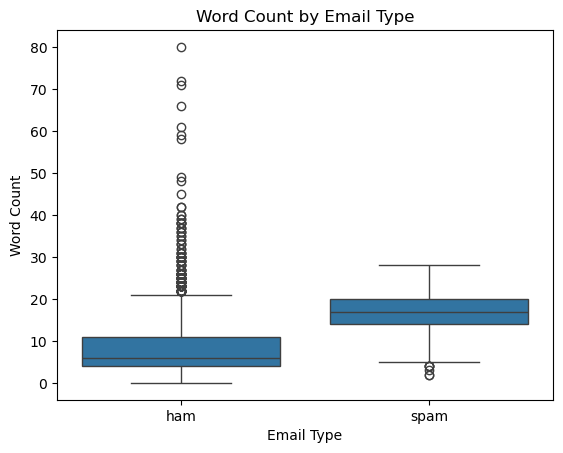

In [16]:
visualization.word_count_by_type()

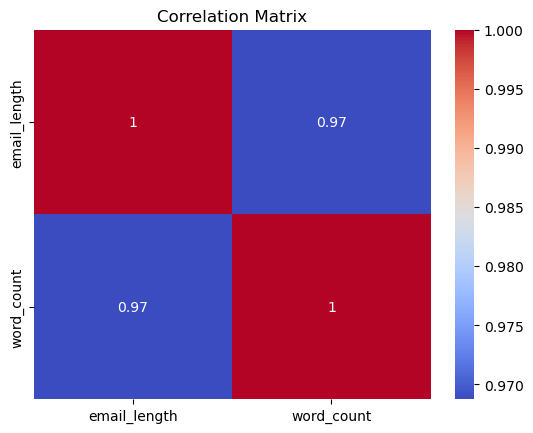

In [17]:
 # Correlation Matrix

visualization.correlation_matrix()